In [1]:
#importaçoes
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\souza\\Downloads\\Projeto 2 -revisão de produtividade de funcionários\\garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Estatistica descritiva

In [3]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [4]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [5]:
#substituiçao de dados nulos pela mediana 
df['wip'] = df['wip'].interpolate(method='linear', limit_direction='forward')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [8]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])

EDA


Analise Univariada 

In [30]:
#separaçao dados numericos e dados categoricos 
num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
cat_col = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns

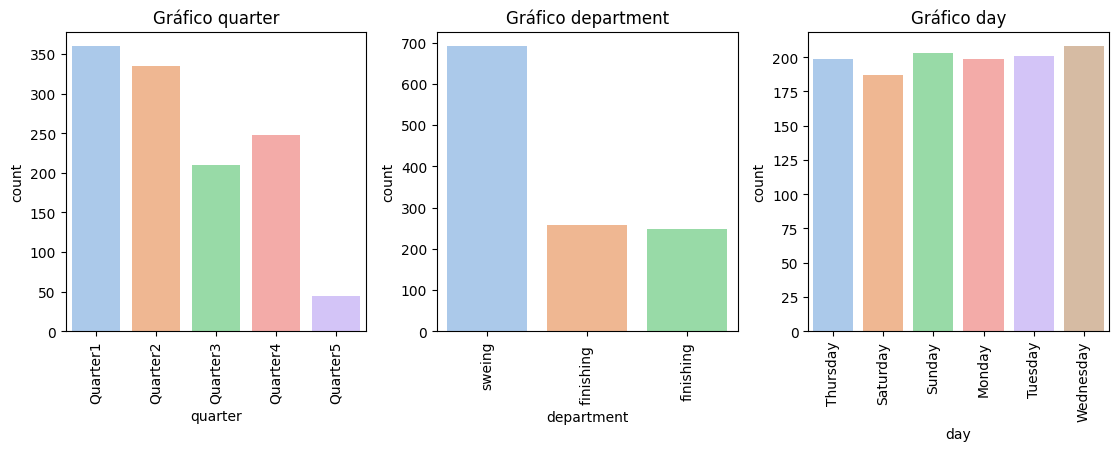

In [31]:
#distribuiçao dados categoricos
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, cat in enumerate(cat_col):
    sns.countplot(data=df, x=cat, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Gráfico {cat}')
    axes[i].tick_params(axis='x', rotation=90)
for j in range(len(cat_col), 12):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

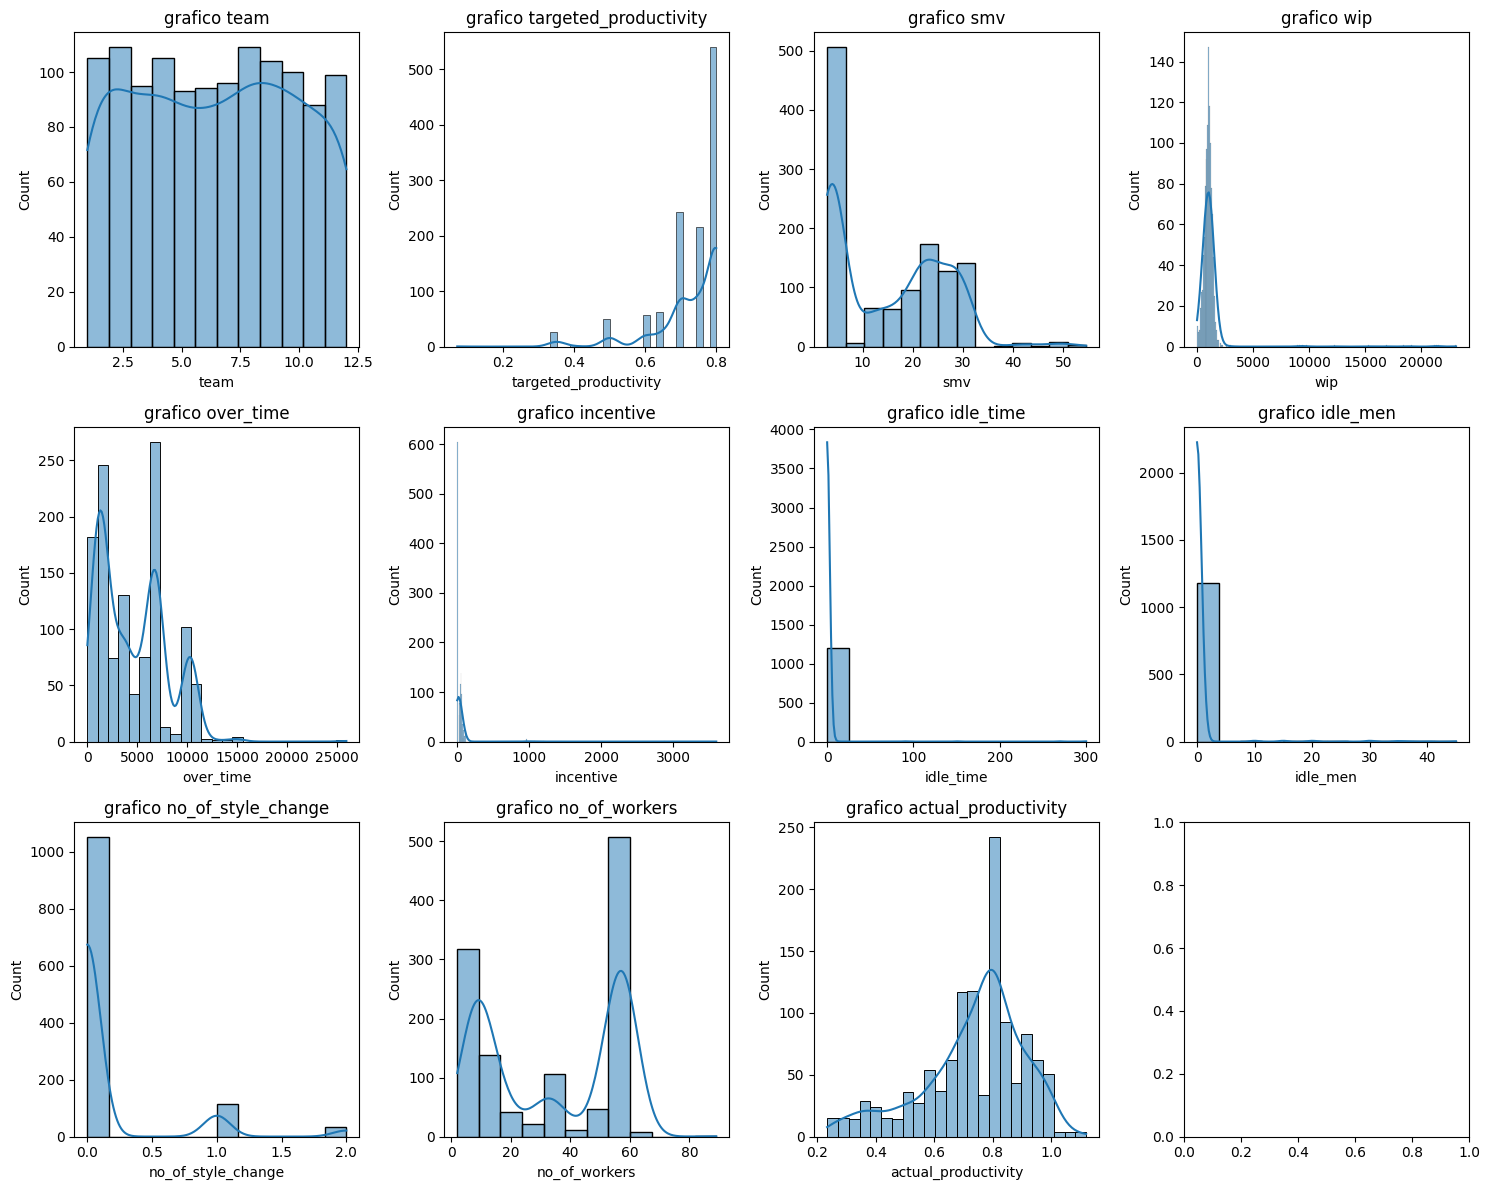

In [32]:
#distribuiçao dados numericos
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.histplot(df[num], kde=True, ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


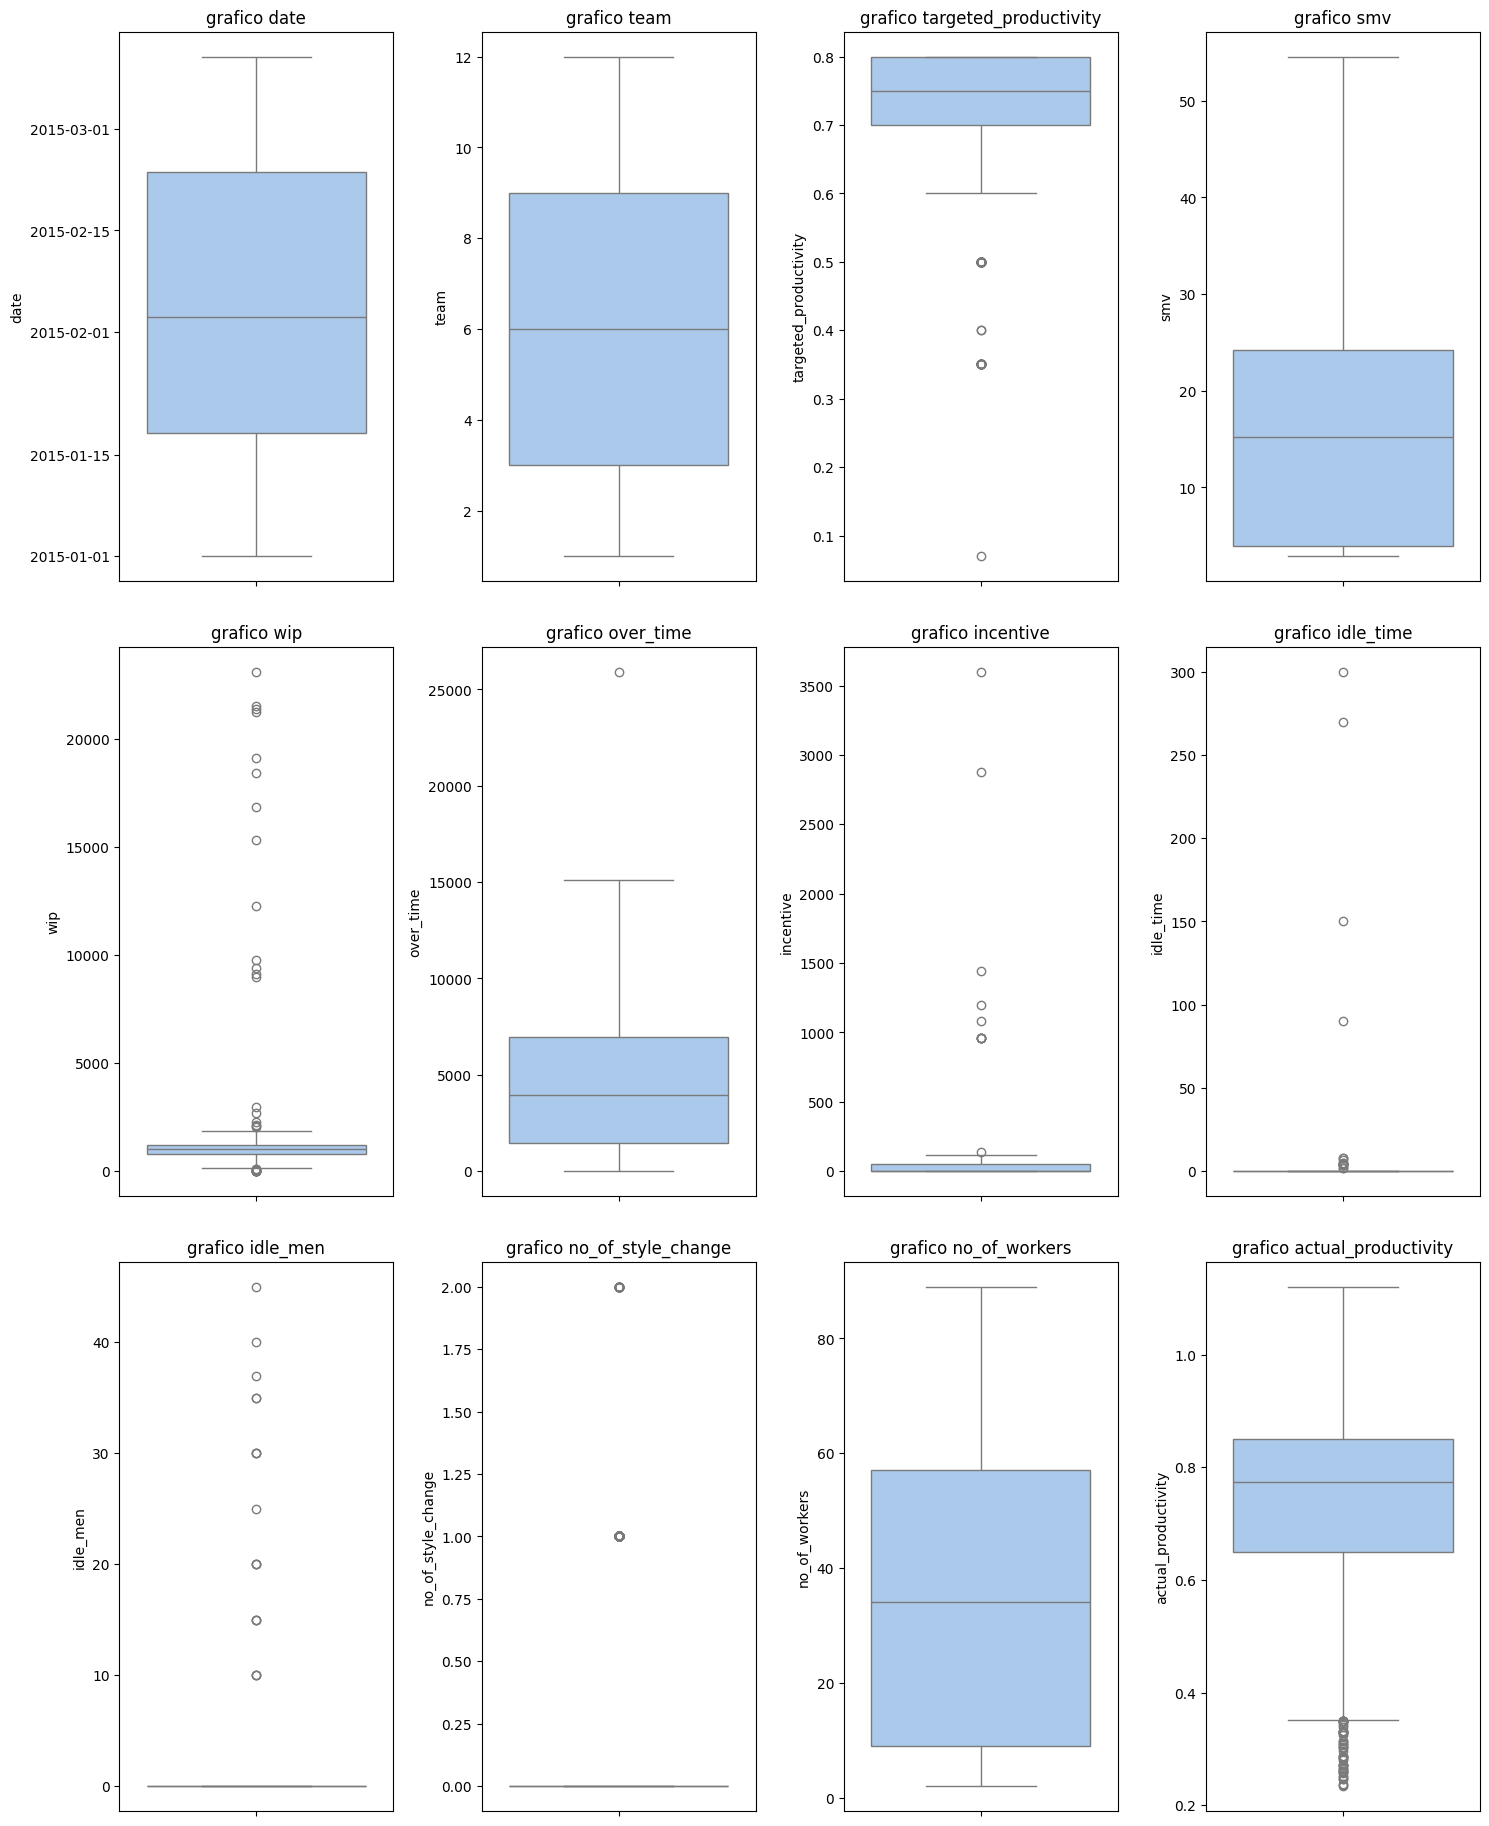

In [13]:
#vizualizaçao em caixa colunas numericas 
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.boxplot(df[num], ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()


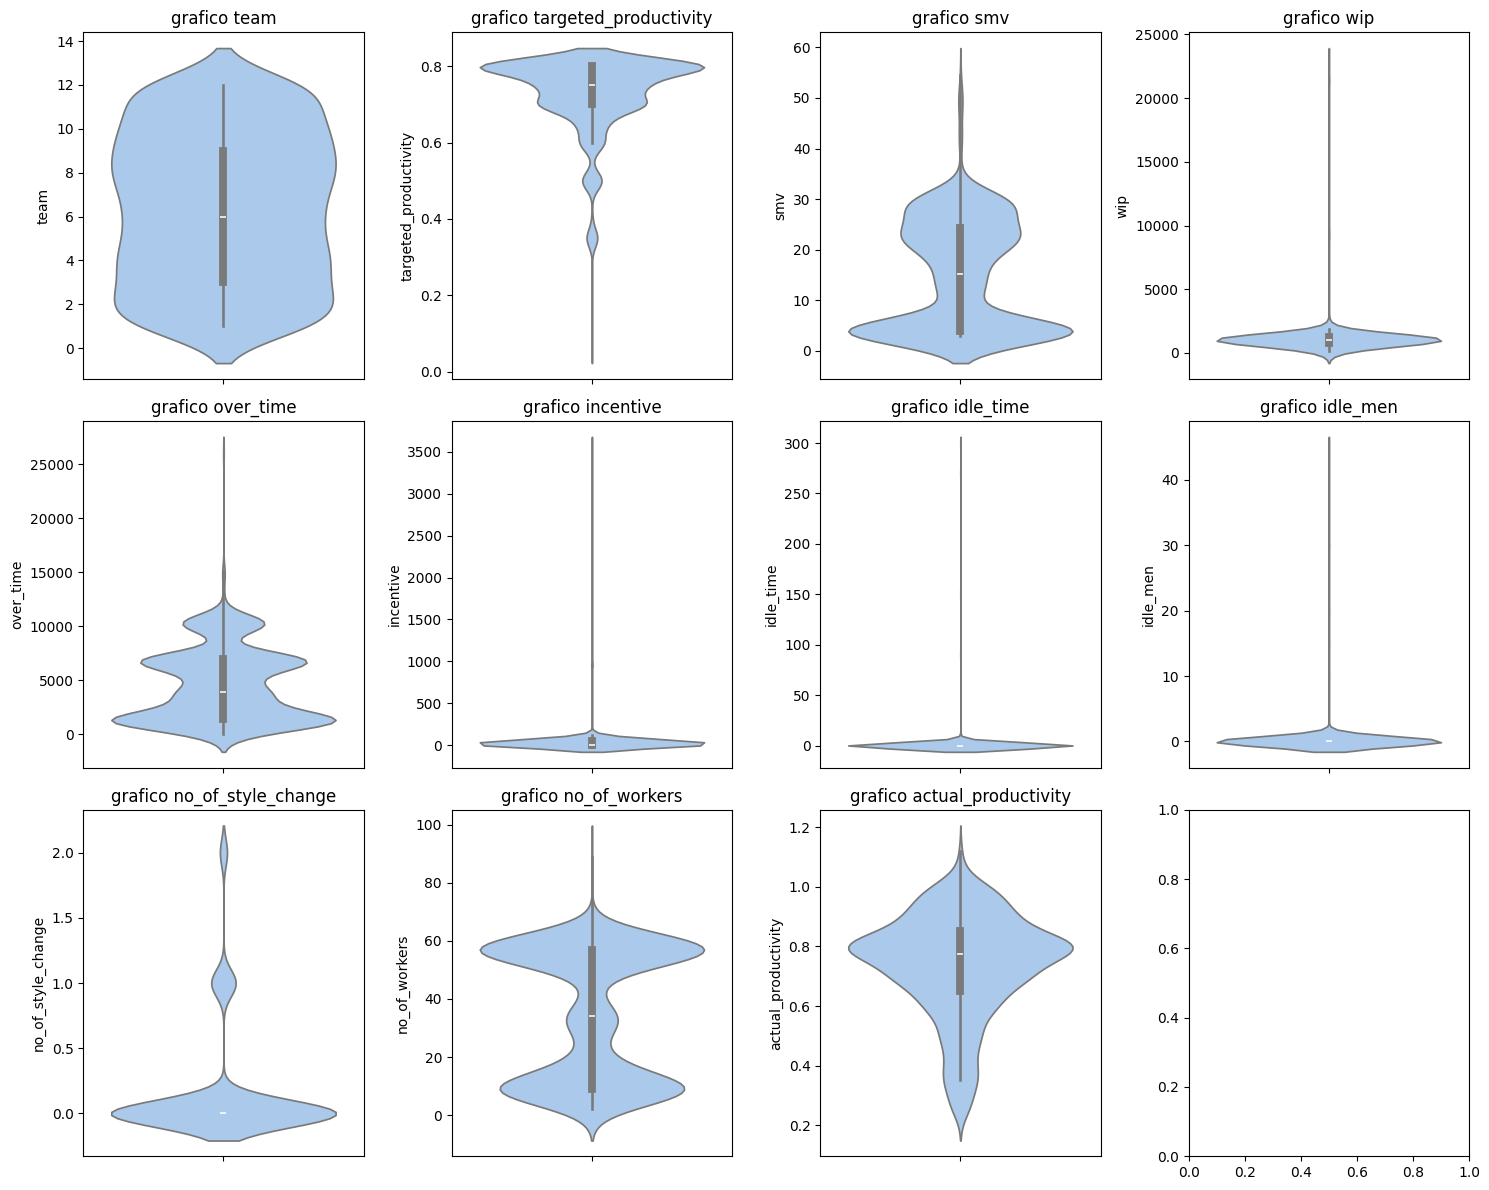

In [33]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.violinplot(df[num], ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


Analise Bivariada 

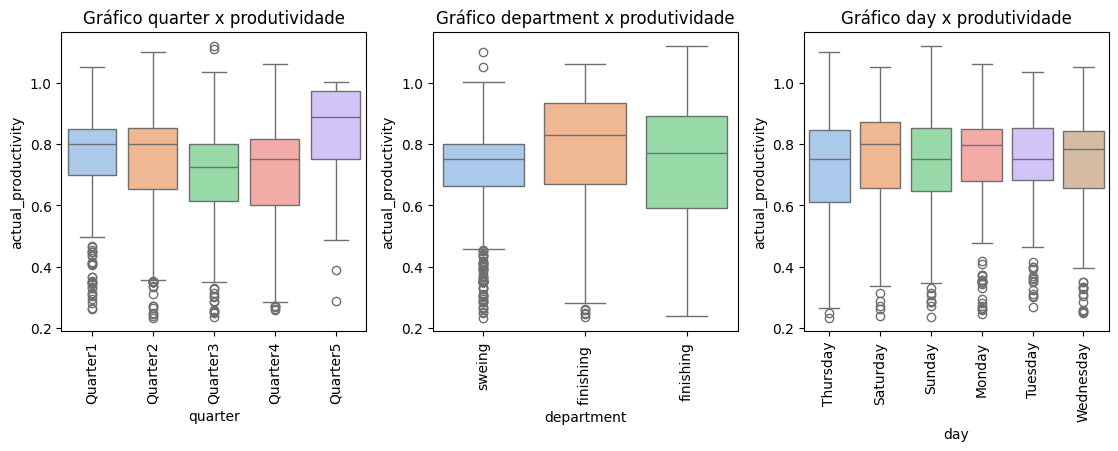

In [34]:
#plot colunas cat x produtividade 
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, cat in enumerate(cat_col):
    sns.boxplot(x=df[cat], y = df['actual_productivity'], ax=axes[i], palette='pastel')
    axes[i].set_title(f'Gráfico {cat} x produtividade')
    axes[i].tick_params(axis='x', rotation=90)
for j in range(len(cat_col), 12):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

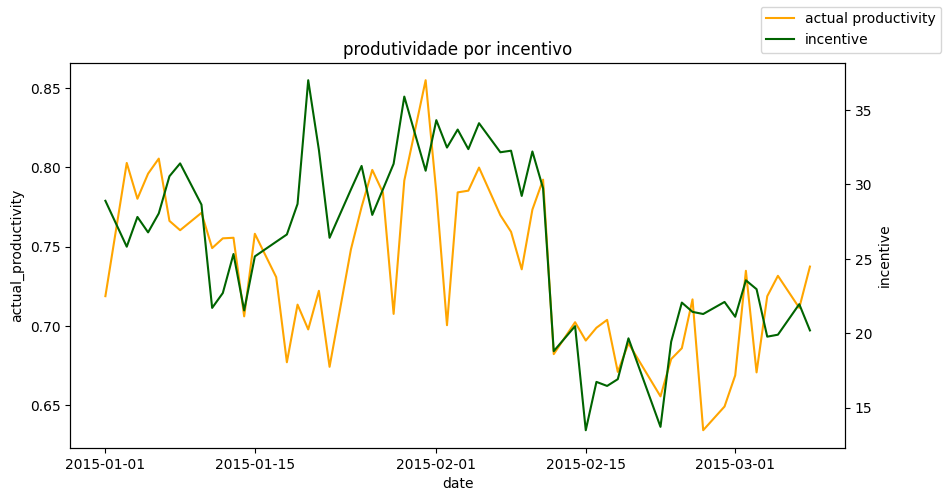

In [38]:
#plot incentive x actual_productivity
df_dt = df[df.date <= pd.to_datetime('2015-03-08')]
plt.figure(figsize=(10,5))
plt.title('produtividade por incentivo')
line1 = sns.lineplot(x='date', y='actual_productivity', data=df_dt, ci= None, color='orange', legend=False, label = 'actual productivity' )
ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=df_dt, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')
line1.figure.legend()

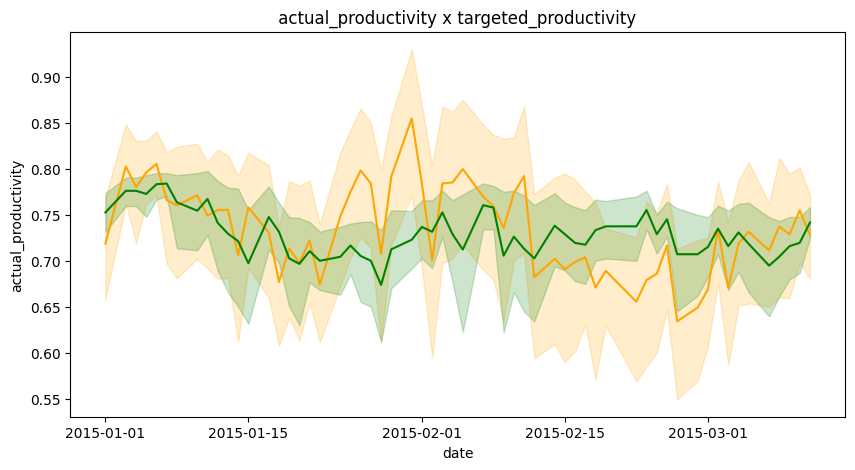

In [ ]:
#analise temporal actual_productivity x targeted_productivity 
plt.figure(figsize=(10,5))
plt.title(' actual_productivity x targeted_productivity ')
sns.lineplot(data=df, x='date', y='actual_productivity', color='orange',label='actual', legend=False)
sns.lineplot(data=df, x='date', y='targeted_productivity', color='green', label='target', legend=False)
plt.show()

Analise Multivariada 

In [19]:
cat_col

Index(['date', 'quarter', 'department', 'day'], dtype='object')

In [20]:
df['date'] = pd.to_datetime(df['date'])

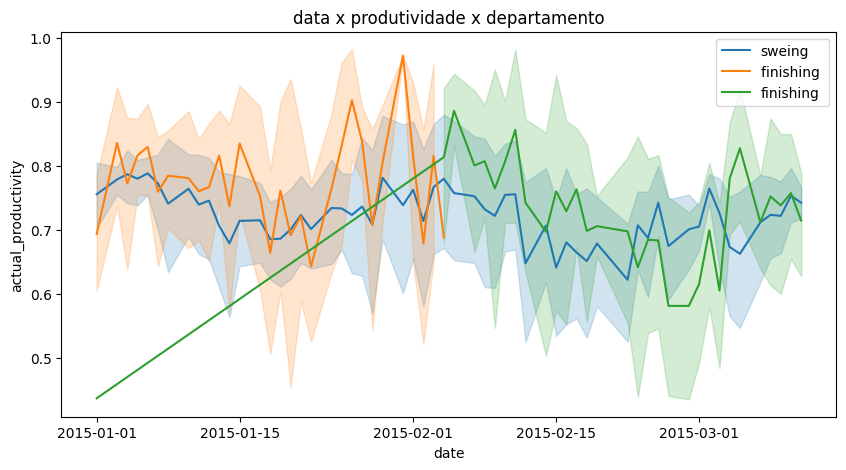

In [21]:
#data x produtividade x departamento
plt.figure(figsize=(10,5))
plt.title('data x produtividade x departamento')
sns.lineplot(data=df, x='date', y='actual_productivity', hue='department')
plt.legend()
plt.show()


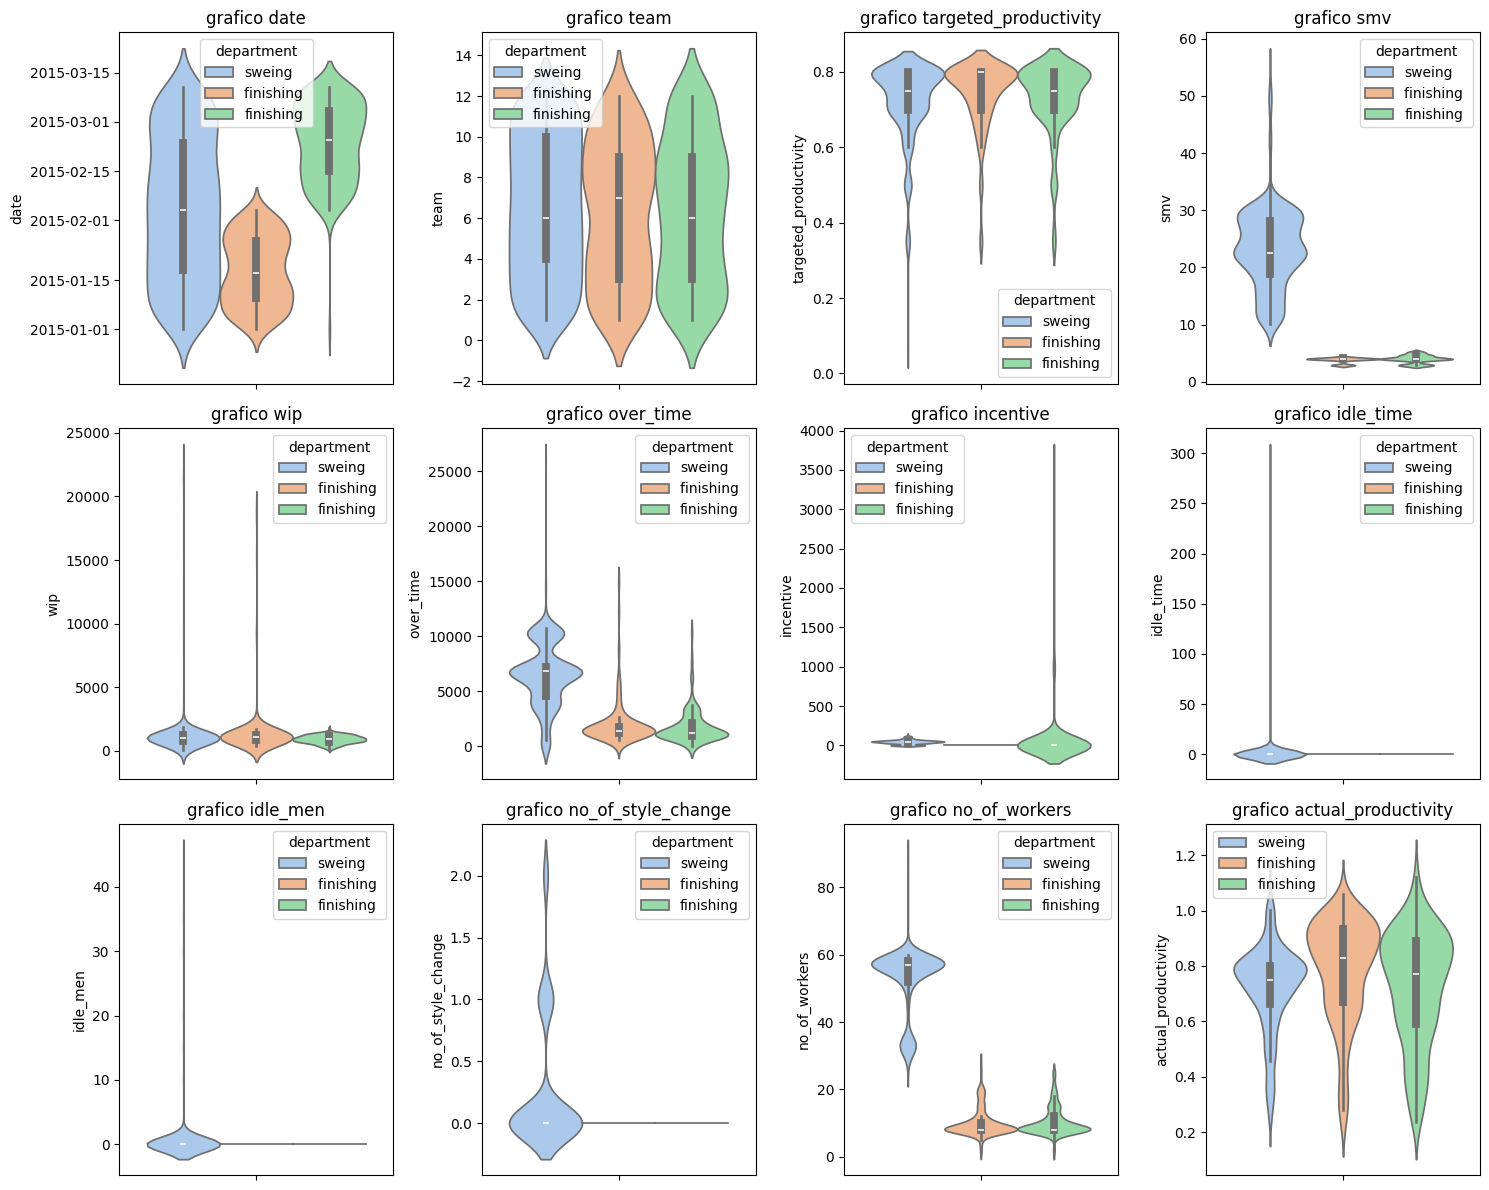

In [22]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.violinplot(y=df[num], ax=axes[i], palette='pastel', hue=df['department'])
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.legend()
plt.show()


<Axes: xlabel='team', ylabel='incentive'>

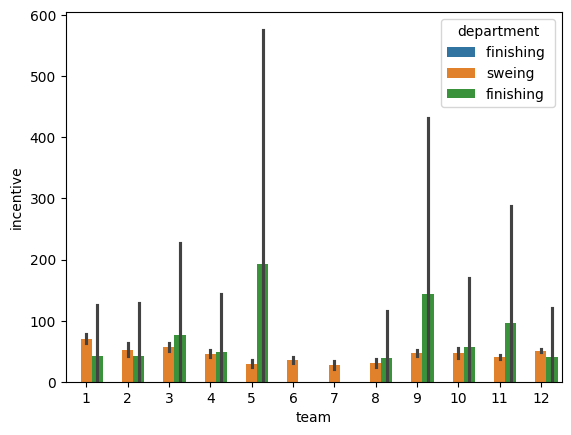

In [23]:
sns.barplot(data=df, x='team', y='incentive', hue='department')

In [24]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')